In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Question 1

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'], index_col='user_id', skiprows=1)
users['age'] = pd.to_numeric(users['age'], errors='coerce')


meanAge = users.groupby('occupation')['age'].mean()

maleRatio = users[users["gender"] == "M"].groupby("occupation")["gender"].count() / users.groupby("occupation")["gender"].count()
sortedMaleRatio = maleRatio.sort_values(ascending=False)

minMaxAges = users.groupby("occupation")["age"].agg(["min", "max"])

meanAgeOccuSex = users.groupby(["occupation", "gender"])["age"].mean()

percentOccu = users.groupby(["occupation", "gender"])["gender"].count() / users.groupby("occupation")["gender"].count() * 100


print("Mean Age per Occupation:\n\n",meanAge.round(2))

Mean Age per Occupation:

 occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64


In [35]:
print("Male Ratio per Occupation:\n\n",sortedMaleRatio.round(2))

Male Ratio per Occupation:

 occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
Name: gender, dtype: float64


In [36]:
print("Min Max of age for each for each Occupation:\n\n",minMaxAges)

Min Max of age for each for each Occupation:

                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [37]:
print("Mean Age per Occupation by gender:\n\n",meanAgeOccuSex.round(2))

Mean Age per Occupation by gender:

 occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
           

In [39]:
print("Occupation by gender percentages:\n\n",percentOccu.round(2))

Occupation by gender percentages:

 occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired       

# Question 2

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

numberOfTeams = euro12["Team"].nunique()
totalColumns = euro12.shape[1]

discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
disciplineByCard = discipline.sort_values(by=["Red Cards", "Yellow Cards"], ascending=False)
meanYellow = discipline.groupby("Team")["Yellow Cards"].mean()
goals6 = euro12.loc[euro12["Goals"] > 6, "Team"]
teamsG = euro12.loc[euro12["Team"].str.startswith("G"), "Team"]
columns7 = euro12.iloc[:, :7]
columnsBut3 = euro12.iloc[:, :-3]

teams3 = ["England", "Italy", "Russia"]
shootingAcc = euro12.loc[euro12["Team"].isin(teams3), ["Team", "Shooting Accuracy"]]

print("Goals column:\n",euro12["Goals"])

Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [41]:
print("Number of teams participated in Euro 2012:", numberOfTeams)
print("Number of columns in the dataset:", totalColumns)

Number of teams participated in Euro 2012: 16
Number of columns in the dataset: 35


In [42]:
print(discipline.to_string(index=False))

               Team  Yellow Cards  Red Cards
            Croatia             9          0
     Czech Republic             7          0
            Denmark             4          0
            England             5          0
             France             6          0
            Germany             4          0
             Greece             9          1
              Italy            16          0
        Netherlands             5          0
             Poland             7          1
           Portugal            12          0
Republic of Ireland             6          1
             Russia             6          0
              Spain            11          0
             Sweden             7          0
            Ukraine             5          0


In [43]:
print(disciplineByCard.to_string(index=False))

               Team  Yellow Cards  Red Cards
             Greece             9          1
             Poland             7          1
Republic of Ireland             6          1
              Italy            16          0
           Portugal            12          0
              Spain            11          0
            Croatia             9          0
     Czech Republic             7          0
             Sweden             7          0
             France             6          0
             Russia             6          0
            England             5          0
        Netherlands             5          0
            Ukraine             5          0
            Denmark             4          0
            Germany             4          0


In [44]:
print("Mean of yellow card per team:\n", meanYellow)

Mean of yellow card per team:
 Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [45]:
print("Teams that scored more than 6 goals:\n", goals6.to_string(index=False))
print("\n\nTeams that start with G:\n", teamsG.to_string(index=False))

Teams that scored more than 6 goals:
 Germany
  Spain


Teams that start with G:
 Germany
 Greece


In [46]:
print("Print first 7 columns:\n", columns7)

Print first 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13        

In [47]:
print("Print all columns but last 3:\n", columnsBut3)

Print all columns but last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13 

In [48]:
print("Shooting accuracy for England, Italy and Russia:\n", shootingAcc.to_string(index=False))

Shooting accuracy for England, Italy and Russia:
    Team Shooting Accuracy
England             50.0%
  Italy             43.0%
 Russia             22.5%


# Question 3

In [52]:
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

dataFrame = pd.concat([series1, series2, series3], axis=1)
dataFrame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(dataFrame)

    bedrs  bathrs  price_sqr_meter
0       4       1            15221
1       2       2            11792
2       4       2            28915
3       3       1            17311
4       4       3            21328
..    ...     ...              ...
95      2       3            12403
96      2       3            15188
97      4       3            29392
98      2       3            23549
99      1       1            12415

[100 rows x 3 columns]


In [53]:
bigcolumn = pd.concat([series1, series2, series3], axis=0)
print("Is bigcolumn only until index 99?", bigcolumn.index.max() == 99)
print(bigcolumn)

Is bigcolumn only until index 99? True
0         4
1         2
2         4
3         3
4         4
      ...  
95    12403
96    15188
97    29392
98    23549
99    12415
Length: 300, dtype: int32


In [54]:
bigcolumn = bigcolumn.reset_index(drop=True)
print(bigcolumn)

0          4
1          2
2          4
3          3
4          4
       ...  
295    12403
296    15188
297    29392
298    23549
299    12415
Length: 300, dtype: int32


# Question 4

In [63]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])

def fixYear(year):
    if year >= 2000:
        year -= 100
    return year

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(lambda x: x.replace(year=fixYear(x.year)))
data.set_index('Yr_Mo_Dy', inplace=True)

missingCount = data.isnull().sum()
print("\n-Missing values:\n", missingCount)

nonMissingCount = data.count()
print("\n-Non-missing values:\n",nonMissingCount)

meanWindspeed = data.mean().mean()
print("\n-Mean windspeeds:\n", meanWindspeed.round(2))

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean().round(2)
loc_stats['std'] = data.std().round(2)
print("\n-loc_stats DataFrame:\n", loc_stats)

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1).round(2)
day_stats['std'] = data.std(axis=1).round(2)
print("\n-day_stats DataFrame:\n", day_stats)

jan = data.resample('M').mean()
jan = jan[jan.index.month == 1]  
print("\n-Average windspeed in January:\n", jan.round(2))

yearlyData = data.resample('Y').mean()
print("\n-Yearly downsampled data:\n", yearlyData.round(2))

monthlyData = data.resample('M').mean()
print("\n-Monthly downsampled data:\n", monthlyData.round(2))

weeklyData = data.resample('W').mean()
print("\n-Weekly downsampled data:\n", weeklyData.round(2))

weeklyStats52 = weeklyData.iloc[1:53].agg(['min', 'max', 'mean', 'std'])
print("\n-Weekly statistics for the first 52 weeks:\n", weeklyStats52.round(2))



-Missing values:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

-Non-missing values:
 RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

-Mean windspeeds:
 10.23

-loc_stats DataFrame:
       min    max   mean   std
RPT  0.67  35.80  12.36  5.62
VAL  0.21  33.37  10.64  5.27
ROS  1.50  33.84  11.66  5.01
KIL  0.00  28.46   6.31  3.61
SHA  0.13  37.54  10.46  4.94
BIR  0.00  26.16   7.09  3.97
DUB  0.00  30.37   9.80  4.98
CLA  0.00  31.08   8.50  4.50
MUL  0.00  25.88   8.49  4.17
CLO  0.04  28.21   8.71  4.50
BEL  0.13  42.38  13.12  5.84
MAL  0.67  42.54  15.60  6.70

-day_stats DataFrame:
              min    max   mean   std
Yr_Mo_Dy                            
1961-01-01  9.29  18.50  13.02  2.81
1961-01-02  6.50  17.54  11.34  3.19
1961-01-03  6.17  18.50  11.64  3.68
1961-01-04  1.79  11.75   6.62 

# Question 5

In [56]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

print("-First 10 entries are:\n", chipo.head(10))

numObservations = len(chipo)
print("\nNumber of observations:\n", numObservations)

numColumns = chipo.shape[1]
print("\nNumber of columns:\n", numColumns)
print("\nName of Columns:\n", chipo.columns)
print("\nDataset Index:\n", chipo.index)

mostOrdered = chipo['item_name'].value_counts().idxmax()
print("\nMost-ordered item:\n", mostOrdered)

mostOrderedCount = chipo[chipo['item_name'] == mostOrdered]['quantity'].sum()
print("\nNumber of", mostOrdered, "ordered:\n", mostOrderedCount)

mostOrderedChoice = chipo['choice_description'].value_counts().idxmax()
print("\nMost-ordered choice_description item:\n", mostOrderedChoice)

totalOrdered = chipo['quantity'].sum()
print("\nTotal number of items ordered:\n", totalOrdered)

chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
print("\nItem price type after conversion:", chipo['item_price'].dtype)

chipo['item_price'] = chipo['item_price'].apply(lambda x: int(float(x)))
print("Item price type after lambda function:", chipo['item_price'].dtype)

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nTotal revenue:\n", revenue)

numOrders = chipo['order_id'].nunique()
print("\nNumber of orders:\n", numOrders)

avgRevenue = revenue / numOrders
print("\nAverage revenue per order:\n", avgRevenue.round(2))

differentItems = chipo['item_name'].nunique()
print("\nNumber of different items sold:\n", differentItems)

-First 10 entries are:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3      

# Question 6

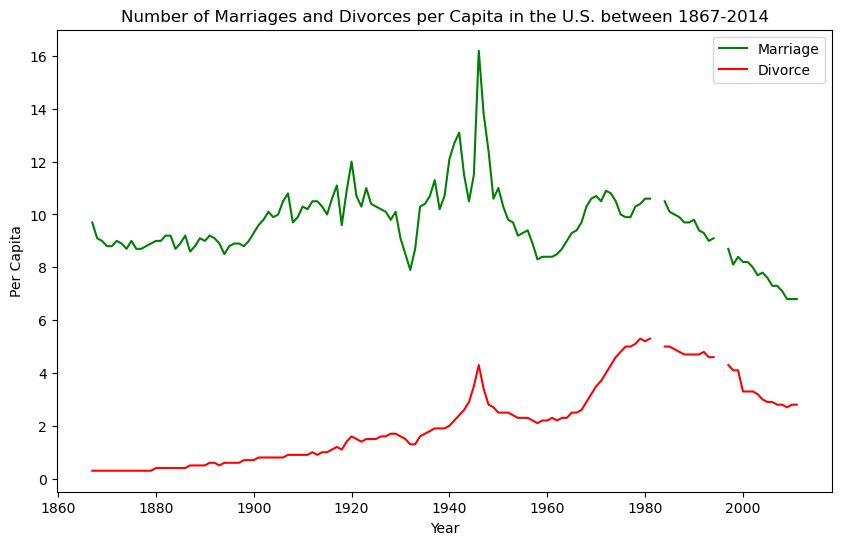

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\us-marriages-divorces-1867-2014.csv")

years = data['Year']
marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_capita, label='Marriage', color='green')
plt.plot(years, divorces_per_capita, label='Divorce', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. between 1867-2014')
plt.legend()
plt.show()

# Question 7

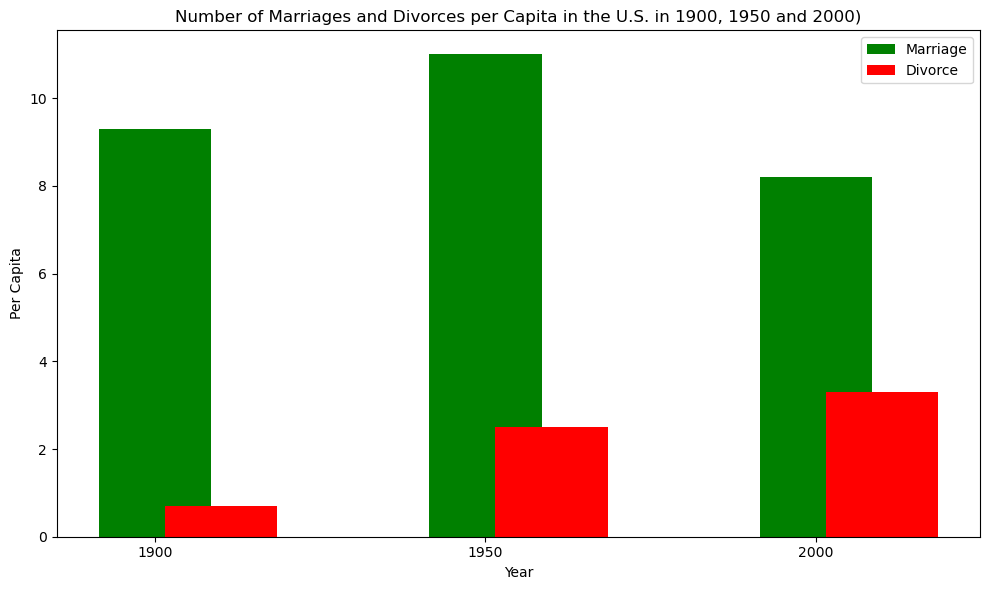

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\us-marriages-divorces-1867-2014.csv")

years = [1900, 1950, 2000]
yearData = data[data['Year'].isin(years)]

plt.figure(figsize=(10, 6))
plt.bar(yearData['Year'], yearData['Marriages_per_1000'], width=17, color='green', label='Marriage')
plt.bar(yearData['Year']+ 10, yearData['Divorces_per_1000'], width=17, color='red', label='Divorce')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. in 1900, 1950 and 2000)')
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()

# Question 8

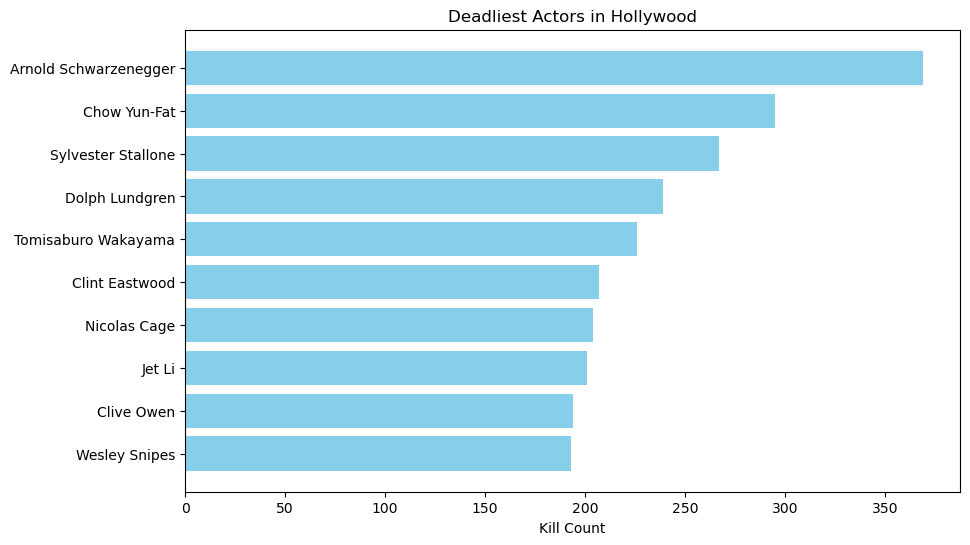

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\actor_kill_counts.csv")
data = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(data['Actor'], data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()
plt.show()

# Question 9

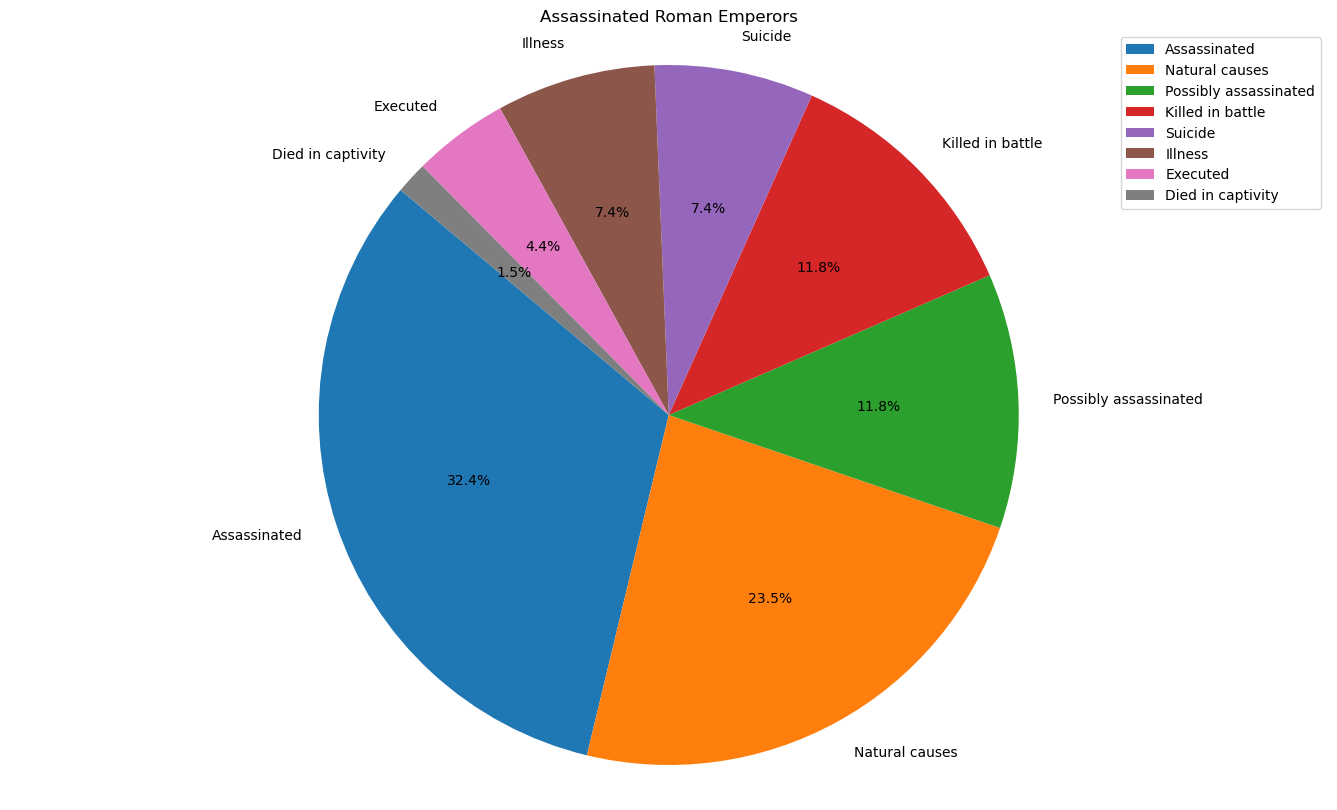

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\roman-emperor-reigns.csv")
category = data['Cause_of_Death'].value_counts()

plt.figure(figsize=(17, 10))
plt.pie(category, labels=category.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Assassinated Roman Emperors')
plt.legend()
plt.show()

# Question 10

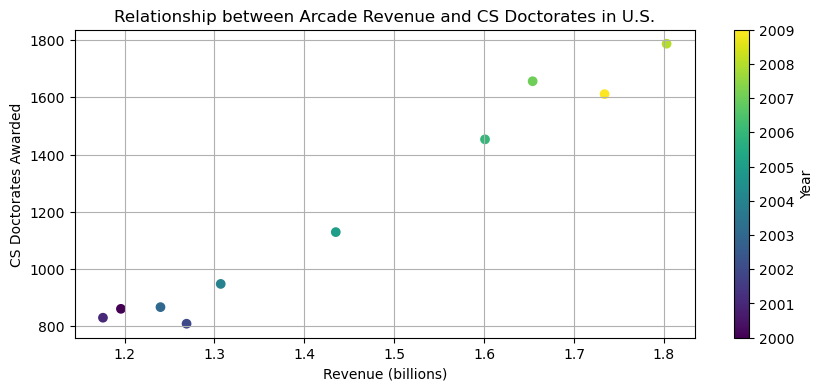

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\BDAT 1004 - Data Programming\PS3\arcade-revenue-vs-cs-doctorates.csv")

plt.figure(figsize=(10, 4))
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.xlabel('Revenue (billions)')
plt.ylabel('CS Doctorates Awarded')
plt.title('Relationship between Arcade Revenue and CS Doctorates in U.S.')
plt.grid(True)
plt.show()